# LEE Analyzer plots


## Imports & Constants

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_columns = 999
gr      = 1.618

mass_p= 0.93827 #GeV
mass_e= 0.00511 #GeV
fid_min=10

In [2]:
# TPC border check
def CheckBorderTPC(x,y,z,tolerance=0):
    detectorx   =256.35     # In cm
    detectory   =116.5      # Symmetric around 0     
    detectorz   =1036.8
    d=tolerance # border tolerance
    if (0+d) < x < (detectorx-d):
            if (-detectory+d)< y < (detectory-d):
                    if (0+d) < z < (detectorz-d):
                        return True
    return False


# True shower energy containment graphs
def effErr(teller,noemer):
    return np.sqrt(teller*(1-teller/noemer))/noemer


# Summed true shower energy, not corrected for electron mass
def true_showerE(row):
    index= np.where( (row['nu_daughters_pdg']==11) | (row['nu_daughters_pdg']==22) )
    E_true = sum(row['nu_daughters_E'][index])
    return E_true

def TrackRecoEnd(row):
    for x,y,z in zip(row['track_end_x'],row['track_end_y'],row['track_end_z']):
        if not CheckBorderTPC(x,y,z,tolerance=fid_min):
            return False
    return True

# Sums hits over the shower objects
def shower_nhits_plane(shower_nhits):
    sh_hits_plane = [0,0,0,0]
    for sh in shower_nhits:
        sh_hits_plane[:-1]+=sh
    sh_hits_plane[-1]=max(sh_hits_plane[:-1])
    return sh_hits_plane

## Load Pickle file

In [4]:
df_shower = pd.read_pickle('Input/nue_cosmic_passed_LEEdef.pckl')
print('Dataframe loaded from Pickle has '+str(len(df_shower.index))+' entries.' )

columns_remove = ['n_tracks','n_showers','vx','vy','vz','interaction_type',
           'true_shower_x_sce','true_shower_y_sce','true_shower_z_sce',
           'nu_daughters_endx','nu_daughters_endy',"nu_daughters_endz",
           'nu_daughters_px','nu_daughters_py','nu_daughters_pz',
           'nu_track_ids','nu_shower_ids','nu_shower_daughters','nu_track_daughters',
           'flash_PE','flash_time',
           'shower_open_angle',
           "track_energy_dedx","track_energy_hits",
           'predict_mu','predict_pi','predict_em','predict_cos',
           'shower_pca','track_pca',
           'shower_dEdx_hits','track_dEdx_hits'
          ]
#df_shower.drop(columns_remove,axis=1,inplace=True)
#df_shower=df_shower.head(10000)

Dataframe loaded from Pickle has 104716 entries.


In [32]:
df_shower['collectionhits']=df_shower['shower_nhits'].apply(lambda x: sum([sh[2] for sh in x]))
print(df_shower.columns)
print(len(df_shower[(df_shower['category'].isin(['e CC'])) & (df_shower['distance']<5) ].index))
df_shower['category'].head()
df_shower[['nu_daughters_pdg','nu_daughters_E','matched_showers','matched_showers_energy','true_shower_depE','true_shower_pdg']].head(150)

Index(['track_start_x', 'track_end_y', 'shower_nhits', 'track_dir_z',
       'true_shower_pdg', 'matched_tracks_energy', 'shower_dir_y',
       'track_end_x', 'distance', 'track_dir_x', 'matched_showers',
       'matched_showers_energy', 'track_start_z', 'nu_daughters_E',
       'track_nhits', 'predict_p', 'true_shower_depE', 'true_vx_sce',
       'shower_length', 'nu_daughters_pdg', 'matched_tracks', 'shower_start_y',
       'category', 'shower_dir_z', 'nu_E', 'shower_start_x', 'track_start_y',
       'true_vz_sce', 'track_end_z', 'shower_energy', 'shower_dir_x',
       'true_vy_sce', 'track_dir_y', 'shower_start_z', 'nu_pdg',
       'true_shower_endx', 'true_shower_endy', 'true_shower_endz',
       'true_shower_tmax_x', 'true_shower_tmax_y', 'true_shower_tmax_z',
       'e_contained', 'e_contained_tmax', 'shower_containment_q',
       'reco_length_containment', 'plane2', 'reconstructed_energy',
       'total_nhits', 'collectionhits'],
      dtype='object')
65338


,nu_daughters_pdg,nu_daughters_E,matched_showers,matched_showers_energy,true_shower_depE,true_shower_pdg
0,"[11, 2212, 2000000101]","[1.12673485372, 1.18992898561, 0.0295]",[11],[1.12673485417],[1124.86766427],[11]
1,"[11, 2212, 2212, 2212, 2212, 2212, 2212, 2212,...","[0.62054578404, 0.993116381057, 0.961430910908...","[11, 211, 2212]","[0.620545784862, 0.152911443978, 0.993118282886]",[619.382347414],[11]
2,"[11, 2212, 2000000101]","[1.16813858941, 1.39064216336, 0.0295]","[11, 2212, 11, 11]","[1.16813858984, 1.39064352154, 1.16813858984, ...",[1165.52623569],[11]
3,"[11, 2212, 211, 2112, 111, 2112]","[1.35399025952, 1.46794638999, 0.281965039482,...","[11, 22, -13, 11]","[1.3539902599, 0.0773335279233, 3.13176905745,...",[741.754406087],[11]
4,"[11, 2212, 2212, 2212, 2212, 2212, 2212, 2212,...","[2.29858545512, 0.942484011412, 0.944120495464...",[11],[2.29858545534],[2263.74832916],[11]
5,"[11, 2212, 2212, 2000000101, 2000000101]","[0.727872718548, 1.12068259719, 1.06106519311,...","[11, 11]","[0.727872719249, 0.727872719249]",[443.329418604],[11]
6,"[11, 2112, 2212, 2000000101, 2000000101]","[1.25797198129, 0.93957, 0.972098565658, 0.029...","[11, 11, -2147483648]","[1.25797198169, 1.25797198169, -1.79769313486e...",[1253.14593284],[11]
7,"[11, 2212, 2212, 2112, 2112, 211, 2112]","[1.03307558941, 0.993838320588, 1.49578669, 0....","[211, -2147483648, 2212, 11]","[0.479099416599, -1.79769313486e+308, 0.993840...",[1031.46013266],[11]
8,"[11, 2212, 2212, 111, 2212]","[0.404275423159, 1.23729570524, 1.02352940514,...","[11, 22]","[0.404275424421, 0.182849634725]",[397.94621402],[11]
9,"[11, 2212, 2212, 2112, 2112]","[0.560442417626, 1.04911435104, 1.08678753794,...","[11, 11, 11, 11]","[0.560442418536, 0.560442418536, 0.56044241853...",[558.42109278],[11]


## Plots

In [ ]:
# Shower hits on collection plain
plt.style.use('default')
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(3.5*gr,3.5),sharey=True)
plt.suptitle(r'Shower hits per plane')
N=50



df_plot = df_shower[(df_shower['category'].isin(['e CC'])) & (df_shower['distance']<5) ]

series_obj = df_plot['shower_nhits'].apply(shower_nhits_plane)
obj =np.vstack( series_obj.values )

labels = ['Plane 0','Plane 1','Plane 2','Max hit plane']

ax[0].hist(obj, N,range=(0,2000), histtype='step', stacked=False, fill=False,label=labels)
b = ax[1].hist(obj, 20,range=(0,50), histtype='step', stacked=False, fill=False,label=labels)
ax[1].axvline(x=5,alpha=.2,color='k',label='Proposed cut')


handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1],loc='upper right')

ax[0].set_ylabel('#Events')
ax[0].set_xlabel('Number of shower hits')
ax[1].set_xlabel('Number of shower hits')

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig('shower_hits.pdf')


In [ ]:

#only use passed events with more than 5 hits on collection plane
df_containment = df_shower[df_shower['collectionhits']>5]
df_plot = df_containment[(df_containment['category'].isin(['e CC'])) & (df_containment['distance']<5) ]

In [ ]:
# Shower containment
plt.style.use('default')
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(5.1*gr,5.1),sharey=True)
#plt.suptitle(r'Shower containment')
N=50

def contained_depE_ratio(row):
    index= np.where( (row['nu_daughters_pdg']==11) | (row['nu_daughters_pdg']==22) )
    E_true = sum(row['nu_daughters_E'][index])
    E_dep  = sum(row['true_shower_depE'])/1000
    if E_dep/E_true > 0.9:
        return True
    return False


df_plot['e_contained_depE']=df_plot[['nu_daughters_pdg',
                                                   'nu_daughters_E',
                                                   'true_shower_depE',
                                                   'true_shower_pdg']].apply(contained_depE_ratio,axis=1)

# Based on 95% Length calc
arr_cont  = df_plot[df_plot['e_contained']==1]['shower_containment_q'].values
arr_ncont = df_plot[df_plot['e_contained']==0]['shower_containment_q'].values
# Based on t_max included
arr_cont_tmax  = df_plot[df_plot['e_contained_tmax']==1]['shower_containment_q'].values
arr_ncont_tmax = df_plot[df_plot['e_contained_tmax']==0]['shower_containment_q'].values
# Based on Depostited in TPC 95%
arr_cont_depE  = df_plot[df_plot['e_contained_depE']==1]['shower_containment_q'].values
arr_ncont_depE = df_plot[df_plot['e_contained_depE']==0]['shower_containment_q'].values


labels=('Contained','Not contained')

#ax[0].set_title('Using Length (95%)')
lab1=labels[0]+' ('+str(len(arr_cont))+')'
lab2=labels[1]+' ('+str(len(arr_ncont))+')'
ax[0].hist([arr_cont,arr_ncont],histtype='step', bins=25, fill=False,label=[lab1,lab2],normed=True)
ax[0].set_xlabel('reconstructed containment [%]')
ax[0].set_ylabel('Normaised')

ax[0].axvline(x=0.75,alpha=.2,color='k',label='Proposed cut')
ax[1].axvline(x=0.75,alpha=.2,color='k',label='Proposed cut')
ax[2].axvline(x=0.75,alpha=.2,color='k',label='Proposed cut')


#ax[1].set_title(r'Using Length ($t_{max}$)')
lab1=labels[0]+' ('+str(len(arr_cont_tmax))+')'
lab2=labels[1]+' ('+str(len(arr_ncont_tmax))+')'
ax[1].hist([arr_cont_tmax,arr_ncont_tmax],histtype='step', bins=25, fill=False,label=[lab1,lab2],normed=True)
ax[1].set_xlabel('reconstructed containment [%]')

#ax[2].set_title('Using Energy (90%)')
lab1=labels[0]+' ('+str(len(arr_cont_depE))+')'
lab2=labels[1]+' ('+str(len(arr_ncont_depE))+')'
ax[2].hist([arr_cont_depE,arr_ncont_depE],histtype='step', bins=25, fill=False,label=[lab1,lab2],normed=True)
ax[2].set_xlabel('reconstructed containment [%]')

offset=0.05
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1],loc='upper center',bbox_to_anchor=(.5, 1.35),title='True Length 95%')
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1],loc='upper center',bbox_to_anchor=(.5, 1.37),title=r'True length $t_{max}$')
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(handles[::-1], labels[::-1],loc='upper center',bbox_to_anchor=(.5, 1.35),title='True deposited E')

plt.tight_layout()
fig.subplots_adjust(top=0.8)
plt.savefig('shower_sp_cont.pdf')


In [ ]:
# True shower energy containment graphs
df_plot['true_shower_E']=df_plot[['nu_daughters_pdg','nu_daughters_E']].apply(true_showerE,axis=1)

norm  = df_plot['true_shower_E'].values
true_l= df_plot[df_plot['e_contained']==1]['true_shower_E'].values
true_tmax = df_plot[df_plot['e_contained_tmax']==1]['true_shower_E'].values
true_depE = df_plot[df_plot['e_contained_depE']==1]['true_shower_E'].values
reco_depQ = df_plot[df_plot['shower_containment_q']>0.75]['true_shower_E'].values
reco_l = df_plot[df_plot['reco_length_containment']==1]['true_shower_E'].values


fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(4.5*gr,3.8),sharey=True)
plt.suptitle(r'Energy dependence of shower containment')
N=8*3
maxE=2.0
      
edges = np.linspace(0,maxE,N+1)
binwidth = edges[1]-edges[0]

labels = ['True length 95%', r'True length $t_{max}$','True deposited E','Reco 75% charge','Reco length']
passed = [true_l,true_tmax,true_depE,reco_depQ,reco_l]


for i,(pass_arr,lab) in enumerate(zip(passed,labels)):
    print('passed',len(pass_arr))
    nom = pass_arr
    denom=norm
    h,_ = np.histogram(nom, bins=edges)
    h_tot,_ = np.histogram(denom, bins=edges)
    
    x_val   = edges[:-1]+binwidth/2                     
    x_error = binwidth/2
    y_val   = h/h_tot
    y_error   = effErr(h,h_tot)
    percent = len(nom)/len(denom)
    percent_err = effErr(len(nom),len(denom))
    lab += ' ('+str(int(percent*1000)/10)+'$\pm$'+str(int(percent_err*1000)/10)+')%'
    ax.errorbar(x_val[0:],y_val[0:],xerr=x_error,yerr=y_error[0:],label=lab,fmt=".")
    ax.legend(loc='lower right')
    ax.grid(alpha=.4)
    ax.set_xlabel(r'True shower energy [GeV]')
    ax.set_ylim(0,1.0)
    ax.set_xlim(0,2.05)
    
ax.set_ylabel(r'Passing rate [%]')
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('passing_rate.pdf')

In [ ]:
# Track length
plt.style.use('default')
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(4*gr,4),sharey=False)
plt.suptitle(r'Tracklength and pdg')
N=50

def track_length(row):
    length=[]
    looplist= zip(row['track_start_x'],row['track_start_y'],row['track_start_z'],
               row['track_end_x'],row['track_end_y'],row['track_end_z'])
    
    for x,y,z,e_x,e_y,e_z in looplist:
        length.append(np.linalg.norm( [x-e_x,y-e_y,z-e_z]   ))
    return length



series_obj = df_shower.apply(track_length,axis=1)
lengths =np.hstack( series_obj.values )
pdgs = np.hstack( df_shower['matched_tracks'].values )


lengths_e = lengths[np.where(pdgs==11)]
lengths_m = lengths[np.where(abs(pdgs)==13)]
lengths_p = lengths[np.where(pdgs==2212)]
lengths_n = lengths[np.where(pdgs==2112)]
lengths_g = lengths[np.where(pdgs==22)]
lengths_pi = lengths[np.where(abs(pdgs)==211)]


data=[lengths_p,lengths_m,lengths_e,lengths_pi,lengths_g,lengths_n]
labels = ['Proton (30167)',r'$\mu^-/\mu^+$ (14014)','Electron (9837)',r'$\pi^-/\pi^+$ (9210)','Gamma (1438)','Neutron (1363)']

ax[0].hist(data, N,range=(0,200), histtype='step', stacked=False, fill=False,label=labels)
ax[1].hist(data, N,range=(0,200), histtype='step',normed=True, stacked=False, fill=False,label=labels)
#ax[0].axvline(x=150,alpha=.2,color='k',label='Proposed cut')
#ax[1].axvline(x=150,alpha=.2,color='k',label='Proposed cut')

ax[0].legend()
ax[0].set_ylabel('#Events')
ax[0].set_xlabel('Tracklength [cm]')

ax[1].set_ylabel('Normalised')
ax[1].set_xlabel('Tracklength [cm]')

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1],loc='upper right')

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig('tracklength.pdf')

unique, counts = np.unique(pdgs, return_counts=True)
print(dict(zip(unique, counts)))

cut=150
print(sum(lengths_p>cut))
print(sum(lengths_m>cut))
print(sum(lengths_e>cut))
print(sum(lengths_pi>cut))
print(sum(lengths_g>cut))
print(sum(lengths_n>cut))
    

In [ ]:
# Track proton score
plt.style.use('default')
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(4*gr,4),sharey=False)
plt.suptitle(r'Track proton score')
N=50

def track_length(row):
    length=[]
    looplist= zip(row['track_start_x'],row['track_start_y'],row['track_start_z'],
               row['track_end_x'],row['track_end_y'],row['track_end_z'])
    
    for x,y,z,e_x,e_y,e_z in looplist:
        length.append(np.linalg.norm( [x-e_x,y-e_y,z-e_z]   ))
    return length


lengths =np.hstack( df_shower['predict_p'].values )
pdgs = np.hstack( df_shower['matched_tracks'].values )


lengths_e = lengths[np.where(pdgs==11)]
lengths_m = lengths[np.where(abs(pdgs)==13)]
lengths_p = lengths[np.where(pdgs==2212)]
lengths_n = lengths[np.where(pdgs==2112)]
lengths_g = lengths[np.where(pdgs==22)]
lengths_pi = lengths[np.where(abs(pdgs)==211)]


data=[lengths_p,lengths_m,lengths_e,lengths_pi,lengths_g,lengths_n]
labels = ['Proton (30167)',r'$\mu^-/\mu^+$ (14014)','Electron (9837)',r'$\pi^-/\pi^+$ (9210)','Gamma (1438)','Neutron (1363)']

ax[0].hist(data, N,range=(0,.005), histtype='step', stacked=False, fill=False,label=labels)
ax[1].hist(data, 20,range=(0,.005), histtype='step',normed=True, stacked=False, fill=False,label=labels)
ax[0].axvline(x=0.0003,alpha=.2,color='k',label='Proposed cut')
ax[1].axvline(x=0.0003,alpha=.2,color='k',label='Proposed cut')

ax[0].legend()
ax[0].set_ylabel('#Events')
ax[0].set_xlabel('BDT Proton score')

ax[1].set_ylabel('Normalised')
ax[1].set_xlabel('BDT Proton score')

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1],loc='upper right')

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig('trackBDT.pdf')

unique, counts = np.unique(pdgs, return_counts=True)
dict(zip(unique, counts))

cut=0.0003
print(sum(lengths_p<cut))
print(sum(lengths_m<cut))
print(sum(lengths_e<cut))
print(sum(lengths_pi<cut))
print(sum(lengths_g<cut))
print(sum(lengths_n<cut))

In [29]:
# Energy study plots:
# Produce 2 dataframes, one before the extra cuts, one after, require both to have the category nu_e
df_plot_before = df_shower[(df_shower['category'].isin(['e CC','Mixed']))]

df_plot_after  = df_plot_before[df_plot_before['collectionhits']>100]
df_plot_after  = df_plot_after[df_plot_after['shower_containment_q']>.75]
df_plot_after  = df_plot_after[df_plot_after.apply(lambda x: np.all(x['predict_p']>0.0003), axis=1)]
df_plot_after  = df_plot_after[df_plot_after.apply(TrackRecoEnd, axis=1)]

print(len(df_plot_before.index))
print(len(df_plot_after.index))

102600
62097


102600
62097


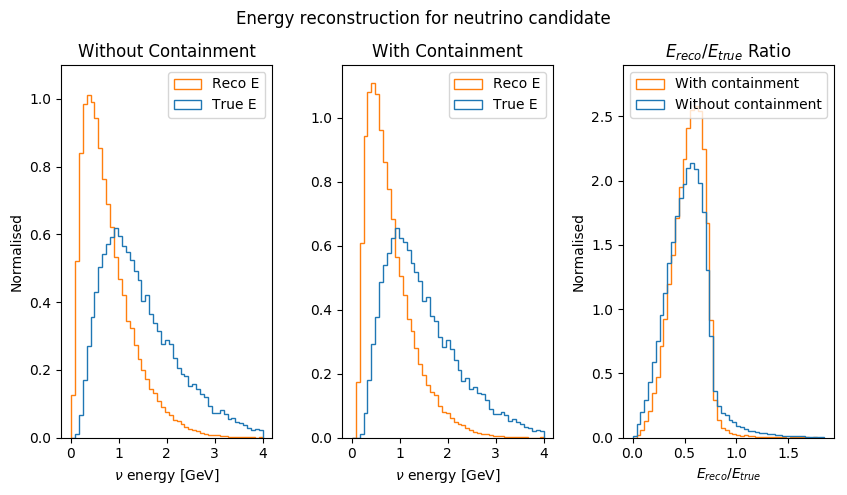

In [30]:
# Total Energy Reconstruction

plt.style.use('default')
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(5.3*gr,5),sharey=False)
plt.suptitle(r'Energy reconstruction for neutrino candidate')
N=50

true_before=df_plot_before['nu_E'] 
true_after =df_plot_after['nu_E']
reco_before=df_plot_before['reconstructed_energy'].apply(lambda x: x[2])
reco_after =df_plot_after['reconstructed_energy'].apply(lambda x: x[2])

print(len(reco_before))
print(len(reco_after))

labels = ['True E','Reco E']
data_before= [true_before,reco_before]
data_after= [true_after,reco_after]

ax[0].hist(data_before,normed=1, bins=np.linspace(0,4.0, N), histtype='step', stacked=False, fill=False,label=labels)     
ax[0].set_xlabel(r'$\nu$ energy [GeV]')
ax[0].set_ylabel('Normalised')
ax[0].set_title('Without Containment')
ax[0].set_ylim(0,1.1)
ax[0].legend(loc=0)

ax[1].hist(data_after,normed=1,  bins=np.linspace(0,4.0, N), histtype='step', stacked=False, fill=False,label=labels)     
ax[1].set_xlabel(r'$\nu$ energy [GeV]')
ax[1].set_title('With Containment')
ax[0].set_ylim(0,1.1)
ax[1].legend(loc=0)

relative = [np.divide(reco_before,true_before),np.divide(reco_after,true_after)]
ax[2].hist(relative,normed=1, bins=N, histtype='step', fill=False,range=[0,1.85],label=['Without containment', 'With containment'])         
ax[2].set_xlabel(r'$E_{reco}/E_{true}$')
ax[2].set_ylabel('Normalised')
ax[2].set_title(r'$E_{reco}/E_{true}$ Ratio')
ax[2].legend()
ax[2].set_ylim(0,2.9)

plt.tight_layout()
fig.subplots_adjust(top=0.87)
plt.savefig('total_E.pdf')

62994
39498


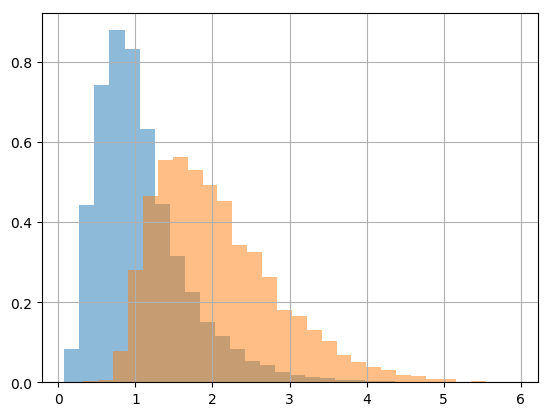

In [31]:
#camparing the events with less than 100 hits with the one of more than 100
df_plot_before = df_shower[(df_shower['category'].isin(['e CC','Mixed']))]

df_plot_after  = df_plot_before[df_plot_before['collectionhits']<500]
print(len(df_plot_after.index))
df_plot_after['nu_E'].hist(bins=30,alpha=0.5,normed=1)

df_plot_after  = df_plot_before[df_plot_before['collectionhits']>500]
print(len(df_plot_after.index))
df_plot_after['nu_E'].hist(bins=30,alpha=0.5,normed=1)